In [225]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [226]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [227]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,desc,text 


In [228]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

inspector = inspect(engine)


In [229]:
# reflect an existing database into a new model
Base= automap_base()



In [230]:
# reflect the tables
Base.prepare(engine, reflect=True)


C:\Users\Diana\AppData\Local\Temp\ipykernel_24864\1982274663.py:2: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [231]:
# View all of the classes that automap found
Base.classes.keys()



['measurement', 'station']

In [232]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

In [233]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [234]:
# Find the most recent date in the data set.
inspector.get_table_names()
columns = inspector.get_columns('measurement')


most_recent_date = session.query(func.max(Measurement.date)).scalar()

print(f"({most_recent_date})")


(2017-08-23)


In [235]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [236]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Last Year: ", last_year)
# Perform a query to retrieve the data and precipitation scores
percip_scores = session.query(Measurement.date, Measurement.prcp). \
    filter(Measurement.date >= '2016-08-23') .\
    all()

percip_scores

Last Year:  2016-08-23


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [237]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

percip_scores= pd.DataFrame(percip_scores)
percip_scores= percip_scores.set_index("date")
percip_scores.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [ ]:
#sort
p_scores_sorted = percip_scores.sort_values(by = "date")
p_scores_sorted.head()

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


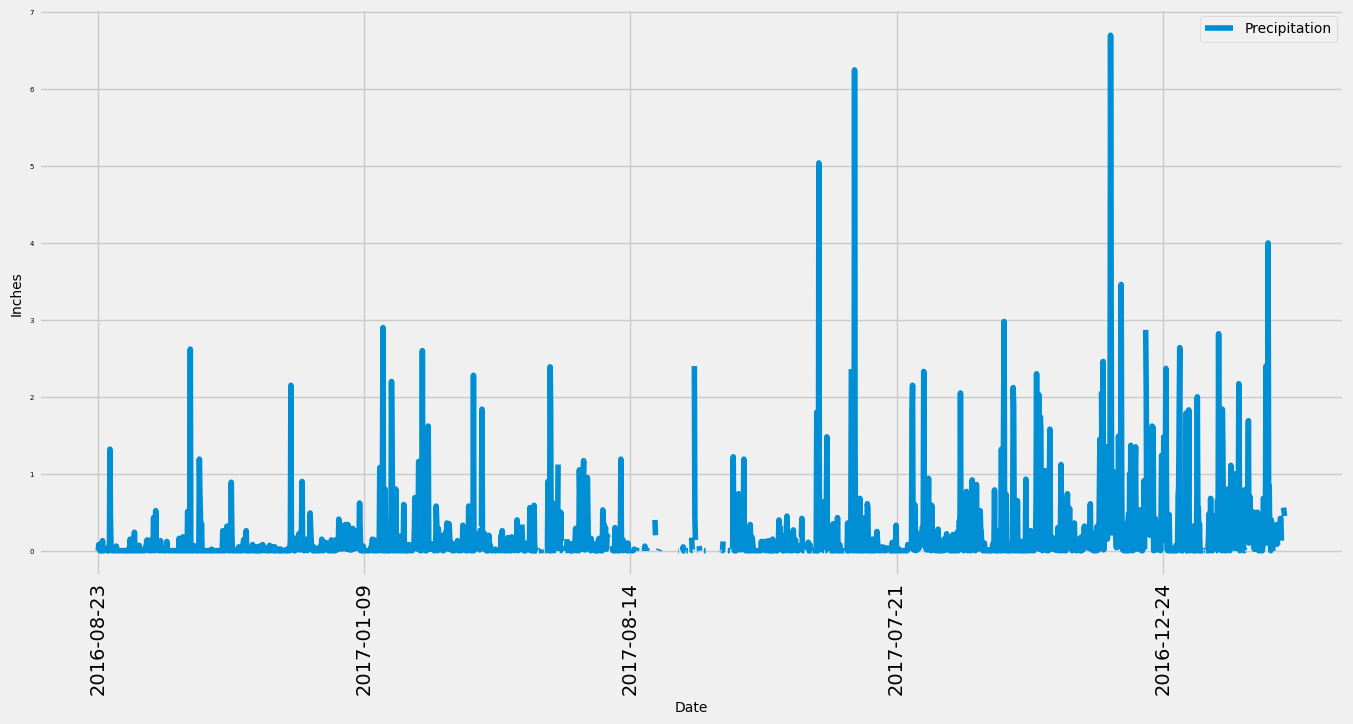

In [283]:
# Use Pandas Plotting with Matplotlib to plot the data
percip_scores.plot(figsize=(15,7))
plt.xticks(rotation='vertical')
plt.yticks(size=5)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Inches', fontsize=10)
plt.legend(['Precipitation'], loc='upper right', fontsize=10)

plt.show()

In [268]:
# Use Pandas to calculate the summary statistics for the precipitation data

percip_scores.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [271]:
# Design a query to calculate the total number of stations in the dataset
columns = inspector.get_columns('station')
session.query(Station.id).count()

9

In [284]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations =[Station.station, func.count(Measurement.station)]
session.query(*most_active_stations,Station.name).filter(Station.station == Measurement.station).group_by(Station.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772, 'WAIHEE 837.5, HI US'),
 ('USC00519397', 2724, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 2709, 'KANEOHE 838.1, HI US'),
 ('USC00519523', 2669, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00516128', 2612, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 2202, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00511918', 1979, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00517948', 1372, 'PEARL CITY, HI US'),
 ('USC00518838', 511, 'UPPER WAHIAWA 874.3, HI US')]

In [289]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = [func.min(Measurement.tobs),
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]
session.query(*station_id).filter(Measurement.station == most_active_stations[0]).all()

[(53.0, 87.0, 73.09795396419437)]

In [292]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).first()




('USC00519281', 2772)

In [294]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_id_n = 'USC00519281'
histogram = session.query(Measurement.tobs).\
    filter(Measurement.date.between('2016-08-23', '2017-08-24'),\
           Measurement.station == station_id_n).all()



(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70')])

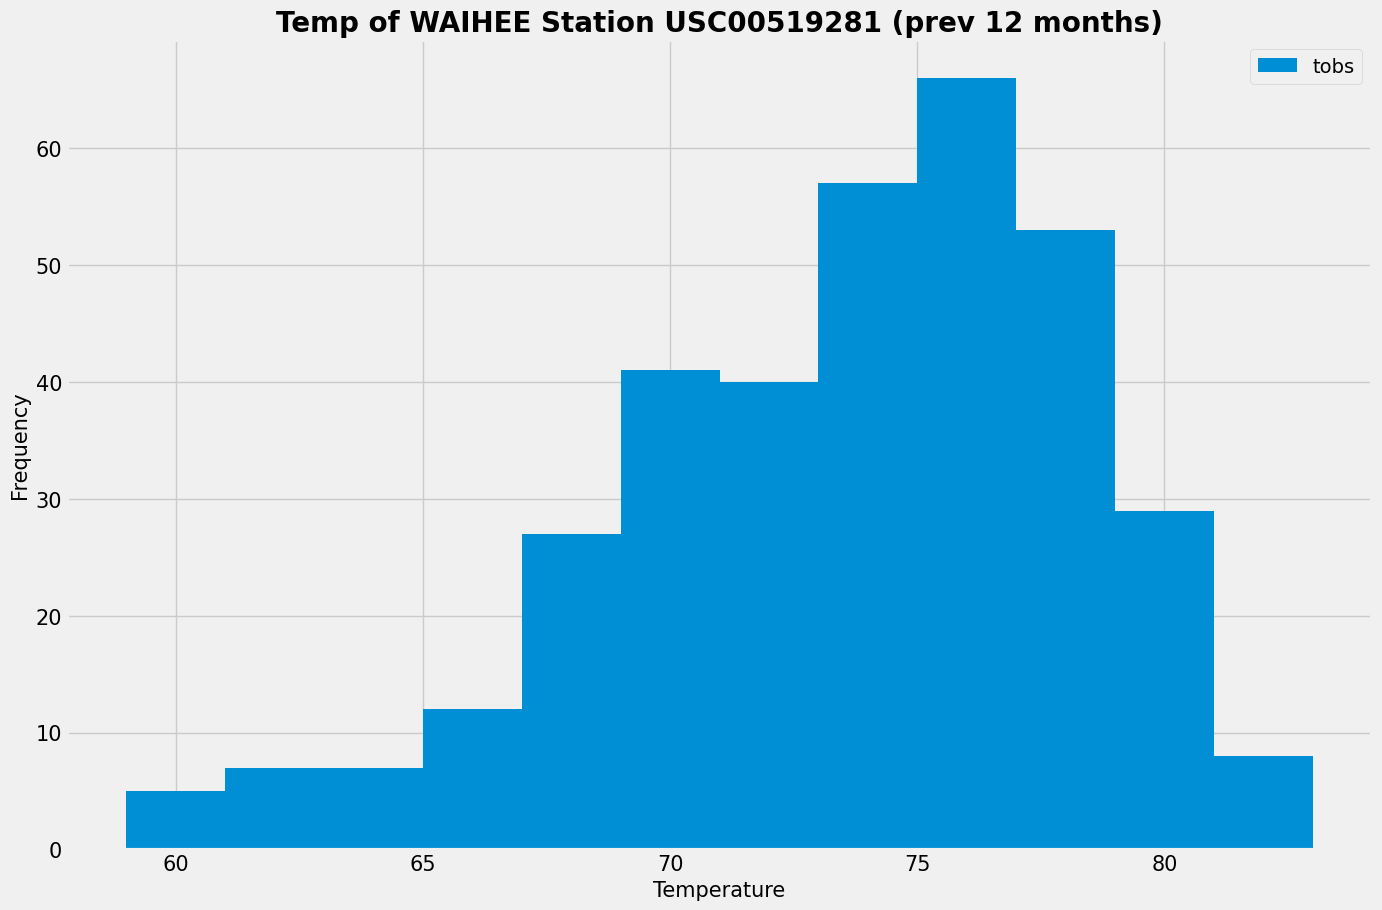

In [298]:
#plt 


plt.figure(figsize=(15,10))
plt.hist(np.ravel(histogram), bins=12)
plt.title('Temp of WAIHEE Station USC00519281 (prev 12 months)', fontsize=20, fontweight='bold')
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(['tobs'], loc='upper right')
plt.xticks(size=15)
plt.yticks(size=15)


# Close Session

In [297]:
# Close Session
session.close()